<a href="https://colab.research.google.com/github/AdityaIngale29/SOC/blob/main/Week_3_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [175]:
from google.colab import files

uploaded=files.upload()

Saving Real-estate.csv to Real-estate (2).csv


In [176]:
df=pd.read_csv(io.BytesIO(uploaded['Real-estate.csv']))
del df['No']
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


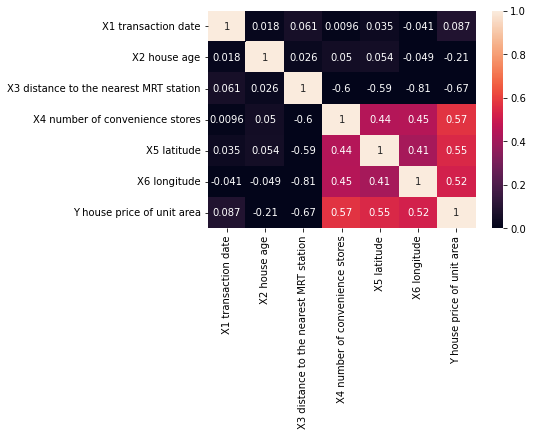

In [177]:
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

In [178]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [179]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [180]:
y_train_pred=regressor.predict(X_train)
y_train_pred

array([33.95144971, 50.22731479, 15.1614628 , 43.6747623 , 42.72167341,
       12.71291993, 33.75751155, 48.94740457, 54.40180313, 38.86269398,
       48.28985978, 24.74600082, 30.44931101, 34.05327605, 49.06340626,
       40.57444356, 43.80095697, 32.37711757, 44.22321131, 43.92172605,
       38.88993763, 47.4016085 , 36.83521543, 29.84942534,  9.41317603,
       34.58466324, 46.26071247, 40.21785359, 30.51835367, 46.23828879,
       45.40466157, 30.33559134, 40.42431635, 36.25440784, 31.03224257,
       12.82407898, 47.16886871, 44.63838135, 47.00467817, 28.83761115,
       43.33133845, 31.34194456, 35.17482966, 32.45772043, 42.10982349,
       45.57980681, 54.27801087, 47.6303398 , 39.54462513, 43.45287619,
       32.48129712, 32.97528453, 22.86066802, 39.8872161 , 34.2025015 ,
       44.00260993, 16.34571206, 45.98817645, 40.39671915, 40.04123094,
       41.53085801, 42.22323394, 39.60712465, 28.848505  , 43.77637791,
        9.14560969, 45.20459473, 15.09610341, 45.30501642, 42.91

In [181]:
y_test_pred=regressor.predict(X_test)
y_test_pred

array([39.41731528, 12.56898219, 42.05406758, 12.35768384, 41.79939346,
       40.21785359, 40.74786196, 33.07722362, 49.80538406, 45.92630597,
       46.2589901 , 40.69208204, 38.80415509, 40.23215588, 47.3727368 ,
       37.76759846, 40.36380515, 40.39671915, 40.89845805, 42.66914728,
       50.34296399, 30.85336233, 39.59052698, 45.53580083, 46.36955422,
       43.80912   , 46.92748195, 25.70338329, 48.27027491, 21.58080398,
       45.02132092, 34.40910369, 42.08442091, 37.89291193, 44.49657761,
       32.0823789 , 48.2142656 , 39.64818553, 53.35343601,  7.47115145,
       53.38737566, 32.47170086])

In [182]:
print(regressor.coef_)

[ 5.13309649e+00 -2.71287801e-01 -4.27970890e-03  1.24547711e+00
  2.22273309e+02  9.63457144e-01]


In [183]:
print(regressor.intercept_)

-15958.37532198228


In [184]:
test_pred=r2_score(y_test,y_test_pred)
train_pred=r2_score(y_train,y_train_pred)
print(test_pred)
print(train_pred)
diff_per=((train_pred-test_pred)/train_pred)*100
print(diff_per)

0.5920552488561914
0.580928083280152
-1.9154118894047971


Since in the above model, r_squared value is around 0.6 the linear regression model isn't very suitable for the database.